In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['png']
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

%load_ext autoreload
%autoreload 2

In [2]:
import pynbody

f = pynbody.load("halo685_tng/snapdir_261/snap_261")
# Note, replace the above filename with testdata/gasoline_ahf/g15784.lr.01024 if you want to use
# the pynbody test data.

h = f.halos()
f.physical_units()

pynbody.analysis.center(h[0])

/Users/app/Science/pynbody/pynbody/snapshot/gadgethdf.py:403: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


<Transformation translate, offset_velocity>

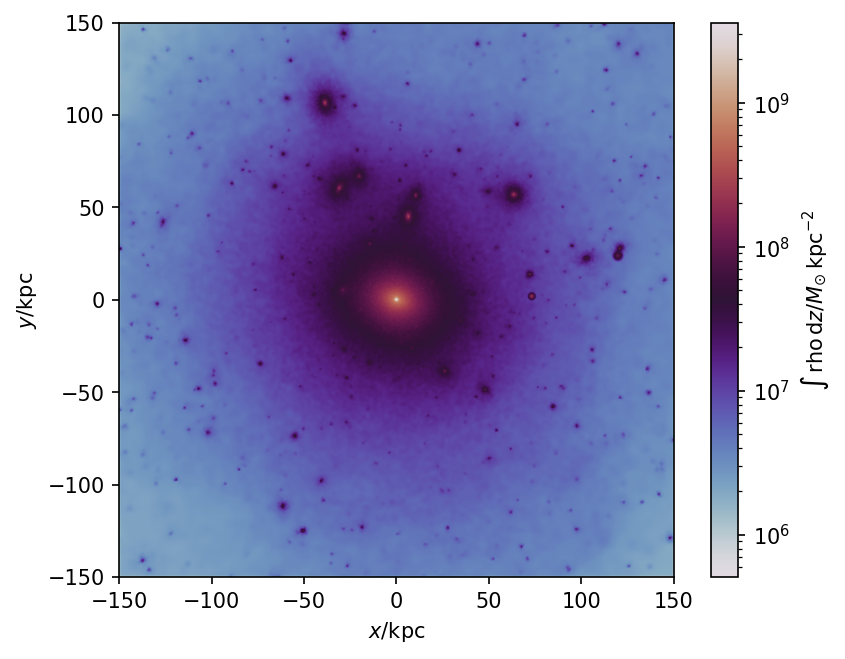

In [3]:
pynbody.plot.image(f.dm, width="300 kpc", units="Msol kpc^-2", cmap="twilight")

Pynbody is aware of the periodicity of cosmological simulations, so if you make a zoomed-out image, you will
see structures repeating. Here, we set the image width to 100 Mpc, but the box size is only around 70 Mpc,
so the periodicity in the large scale structure starts to become visible.

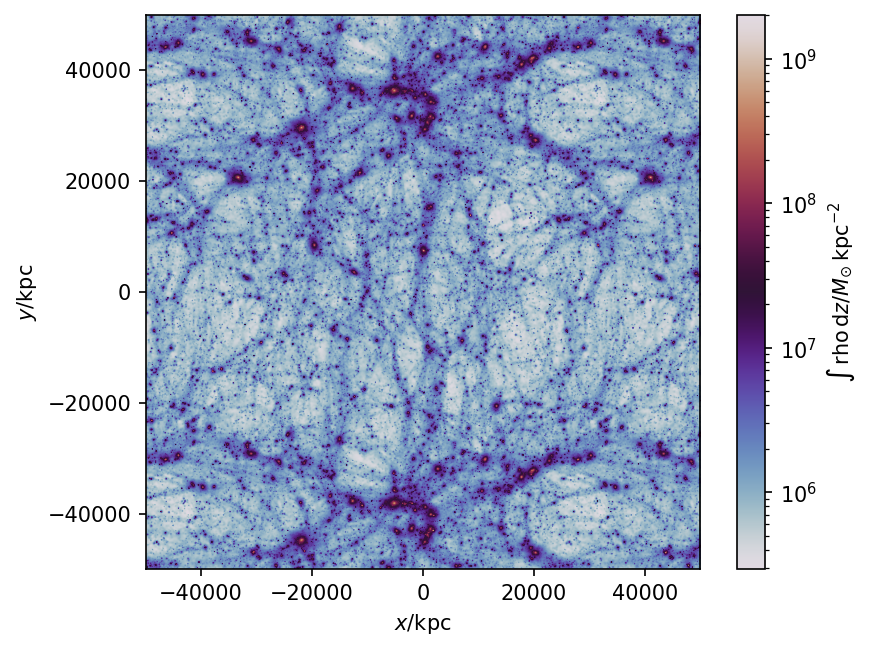

In [4]:
pynbody.plot.image(f.dm, width="100 Mpc", units="Msol kpc^-2", cmap="twilight")

We can switch to estimating density of other particles just by passing in the appropriate family view
of the simulation. Switching from ``f.dm`` to ``f.gas`` lets use see the central galaxy's gas content.

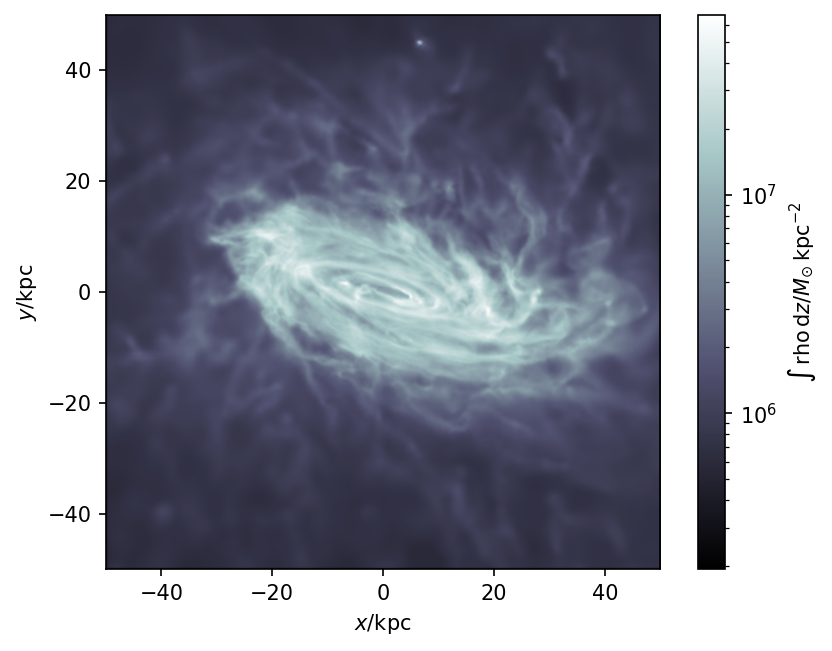

In [5]:
pynbody.plot.image(f.gas, width="100 kpc", units="Msol kpc^-2", cmap="bone")

Next, we transform the simulation to look at the disk face-on. Note that the surface density is always
with respect to the line of sight, so once transformed we are getting the true gas surface density
of the disk.

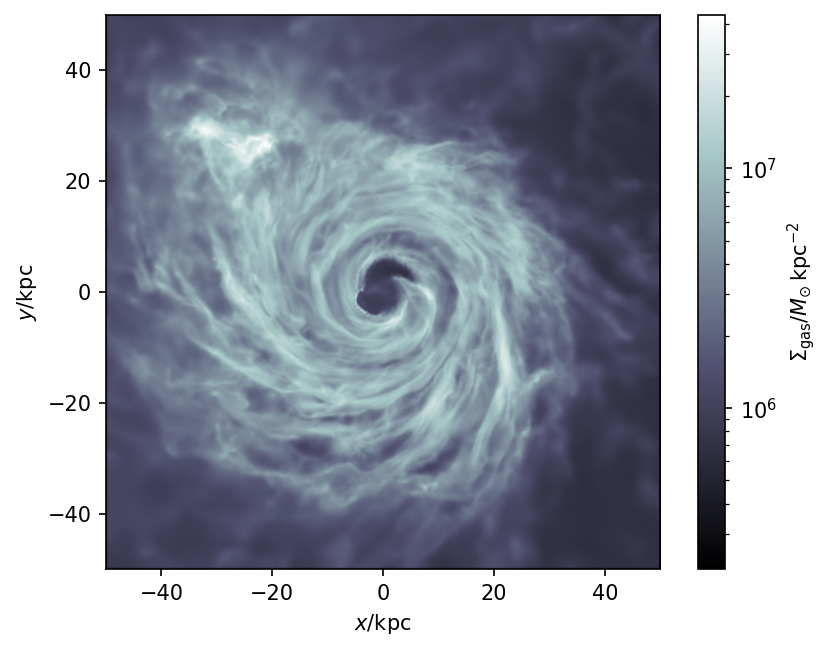

In [6]:
with pynbody.analysis.faceon(h[0]):
    pynbody.plot.image(f.gas, width="100 kpc", units="Msol kpc^-2", cmap="bone", 
                       colorbar_label=r"$\Sigma_{\mathrm{gas}} / M_{\odot}\,\mathrm{kpc}^{-2}$")

Next, we are going to switch to looking at the physical (unprojected) density. We can do this simply by
removing the units keyword, to get a view of the density in a thin plane through z=0. This is the disk
plane if we continue to wrap the image command inside the ``faceon`` context. We also provide an explicit
``vmin`` and ``vmax`` to give the minimum and maximum values in the colormap. In the previous examples,
the default was used, in which the colormap is scaled to the minimum and maximum values in the image.
However the dynamic range of the density is too large for that, so we specify our own min/max.

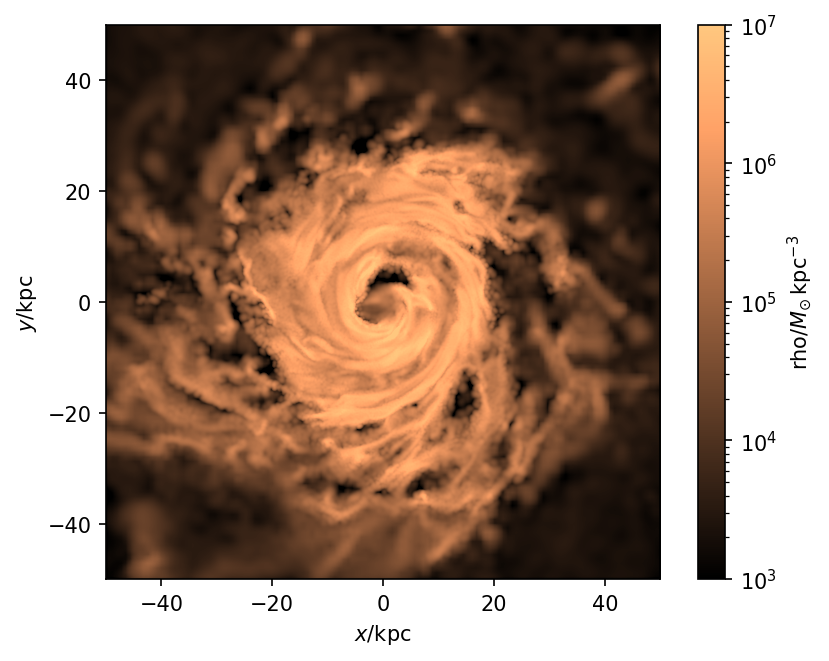

In [7]:
with pynbody.analysis.faceon(h[0]):
    pynbody.plot.image(f.gas, width="100 kpc", cmap="copper", vmin=1e3, vmax=1e7)

Plotting other quantities
-------------------------

So far, we have been plotting the density, but we can specify any other quantity via the second argument
of ``image``. We can pass either an array (which must match the length of the snapshot being imaged), or
the name of an array within the snapshot. Here we ask for the temperature. Note the width has been increased
to 400 kpc, so we are looking at the temperature structure of the circumgalactic medium. Just as by default
the density plot would return a slice through the z=0 plane, so here too we get the temperature in a thin
slice through z=0.

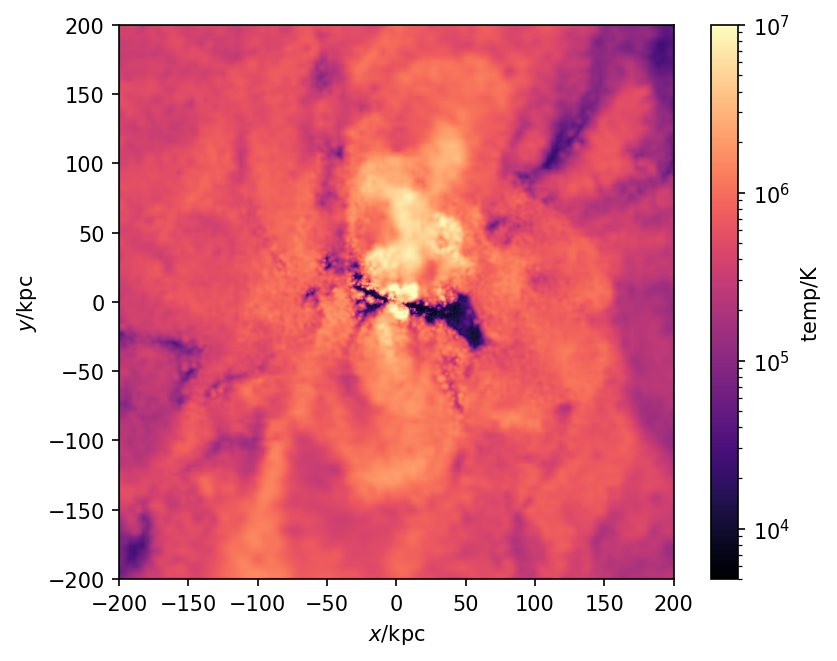

In [8]:
pynbody.plot.image(f.gas, 'temp', width="400 kpc", cmap="magma", vmin=0.5e4, vmax=1e7)

The image looks good, but a little grainy. The graininess is due to SPH interpolation being inherently noisy.
To smoothly interpolate temperature values rather than make strict SPH estimates, pass ``denoise=True``.
This looks better:

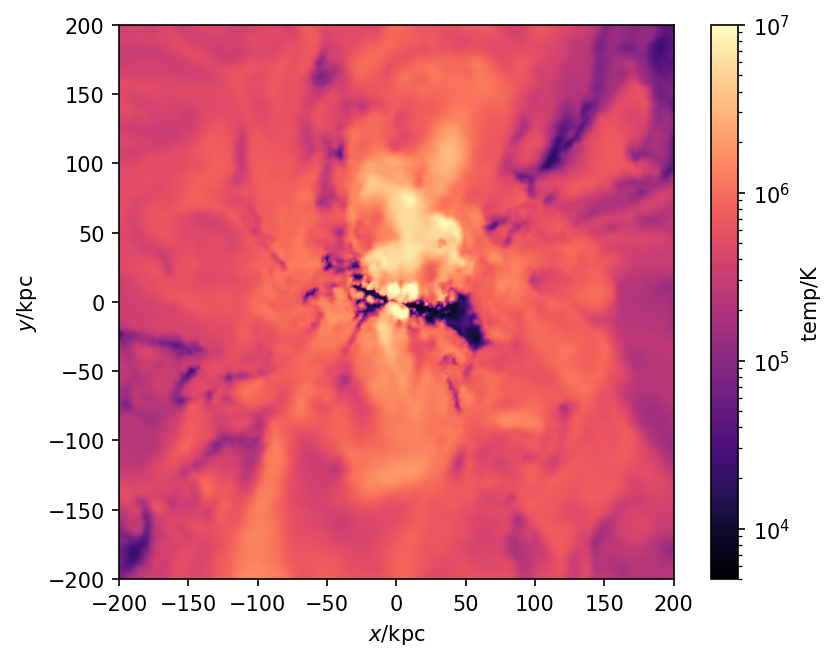

In [9]:
pynbody.plot.image(f.gas, qty='temp', width="400 kpc", cmap="magma", vmin=0.5e4, vmax=1e7, denoise=True)

Just as we can project the density, we can also project other quantities. However for this we need
to be a bit more specific about what we want, and weight it down the z-axis (line of sight) with respect 
to another variable. This variable is passed in the ``weight`` keyword. 
For example, a density-weighted temperature map is obtained as follows:

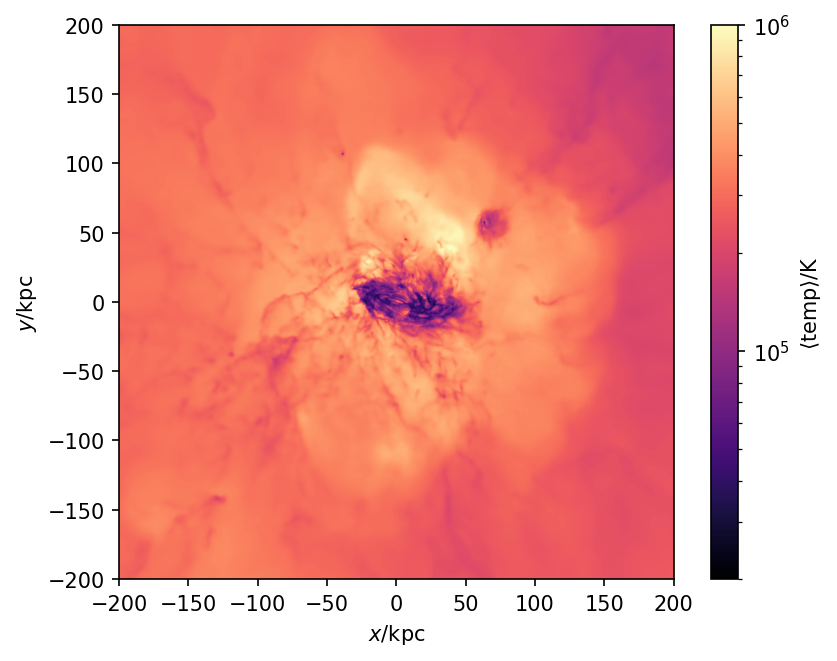

In [10]:
pynbody.plot.image(f.gas, qty='temp', width="400 kpc", cmap="magma", vmin=2e4,vmax=1e6, 
                   weight='rho')

Due to the density-weighting, the temperature map in the centre is dominated by the disk.
This may be exactly the appropriate view, but in other cases you might prefer a volume-weighted
average. This is obtained by passing ``weight=True``. Note, however, that this can cause the
result to be dominated by the entire intergalactic medium through which the line of sight passes.
Therefore we restrict the z-range to the same as the image width, by passing ``restrict_depth=True``.
Since our width is 400 kpc, this implies $-200 < z < 200$ kpc. This looks very different:

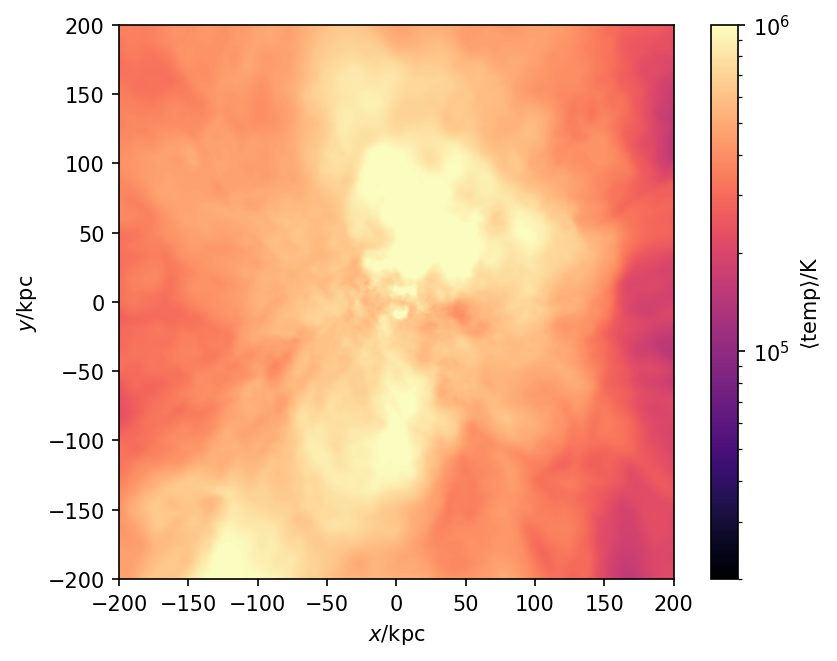

In [11]:
pynbody.plot.image(f.gas, qty='temp', width="400 kpc", cmap="magma", vmin=2e4,vmax=1e6, 
                   weight=True, restrict_depth=True)

Velocity images
---------------

One often wants to understand the flow of gas as well as its thermodynamic properties. Pynbody can
overplot velocity information on top of an image. Here we plot the temperature, but overlay the
velocity field as a quiver plot. There are a lot of options controlling the appearance of the velocity 
field; perhaps most importantly, the ``vector_scale`` keyword controls the length of the arrows by specifying 
how large the velocity would need to be for the arrow to occupy the full plot width. The ``key_length``
keyword, on the other hand, specifies the length of the arrow to show in the key. 

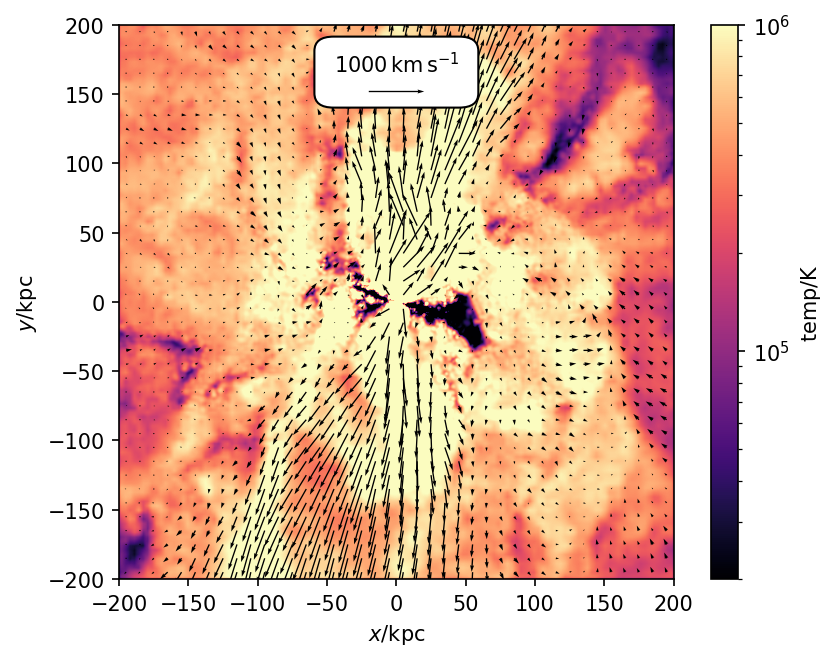

In [12]:
pynbody.plot.sph.velocity_image(f.gas, qty='temp', width="400 kpc", cmap="magma", 
                                vmin=2e4, vmax=1e6, 
                                vector_scale="1e4 km s^-1", key_length = "1000 km s^-1",
                                key_bg_color='white')

One may combine velocity imaging with averaging along the line of sight. Here we return to the volume-weighted
temperature map, but overlay the velocity field. The velocity field is weighted and restricted in depth in just
the same way as the underlying map:

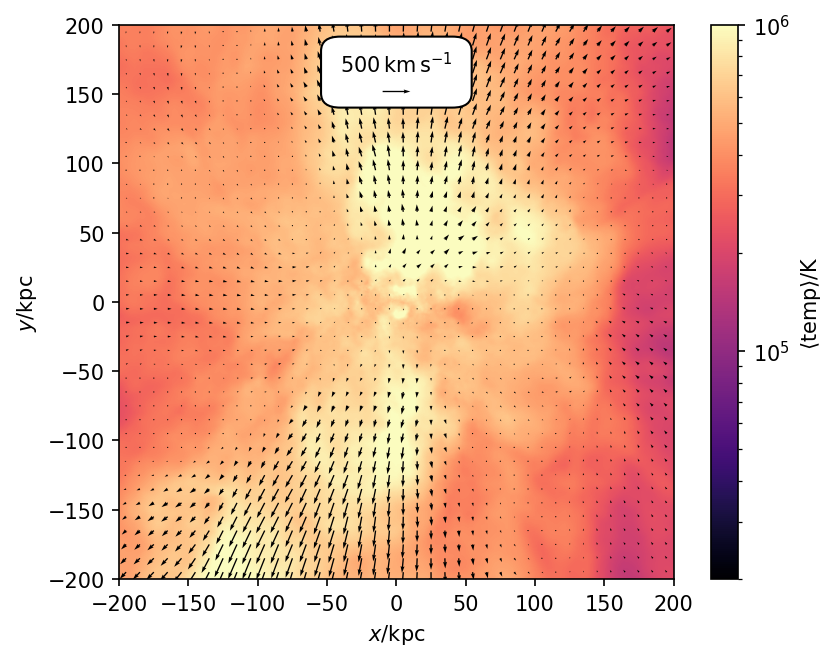

In [13]:
pynbody.plot.sph.velocity_image(f.gas, qty='temp', width="400 kpc", cmap="magma", 
                                vmin=2e4, vmax=1e6, 
                                vector_scale="1e4 km s^-1", key_length = "500 km s^-1",
                                weight=True, restrict_depth=True)

For some purposes, streamplots are better than quiver fields. These can be enabled by setting ``mode='stream'``.
Here, we make a face-on slice of the density, and the corresponding slice of the velocity field is used to make
streamlines. Note also that we can set ``vector_color='white'`` to make the streamlines more visible on this
particular background.

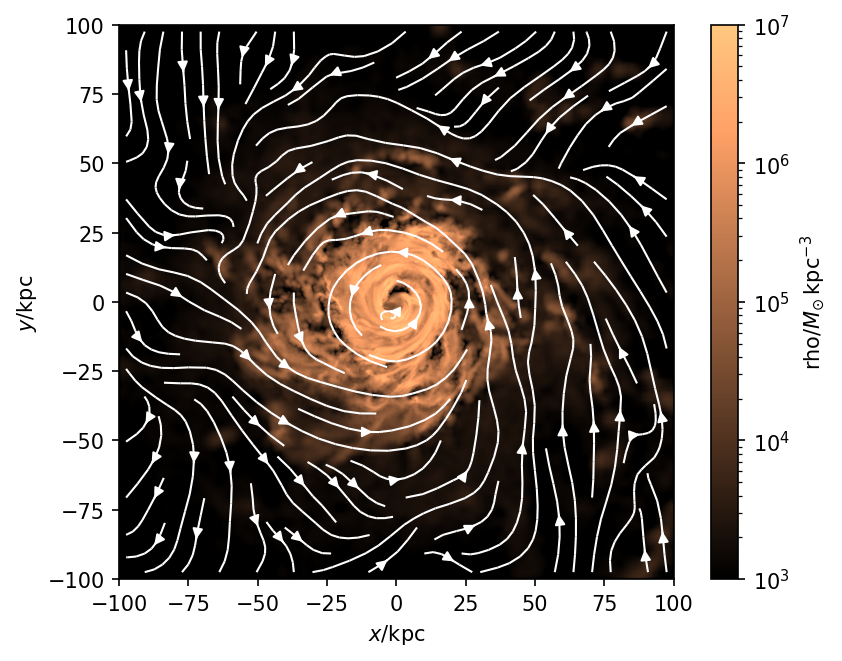

In [14]:
with pynbody.analysis.faceon(h[0]):
    pynbody.plot.sph.velocity_image(f.gas, qty='rho', width="200 kpc", cmap="copper", 
                                    vmin=1e3, vmax=1e7,
                                    mode='stream', vector_color='white')

If your simulation has other vector fields, like magnetic fields for example, these can also be plotted.
In this final example of vevtor plotting, we show the magnetic field lines overlaid on the density map. We 
make them more closely spaced by setting ``density=2.0``.

/Users/app/Science/pynbody/pynbody/snapshot/gadgethdf.py:427: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


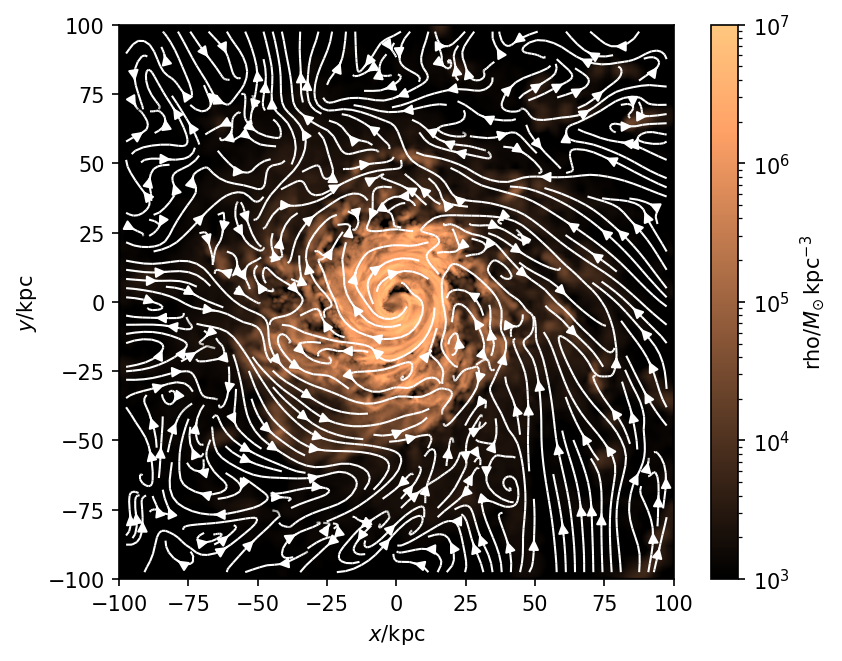

In [15]:
with pynbody.analysis.faceon(h[0]):
    pynbody.plot.sph.velocity_image(f.gas, qty='rho', width="200 kpc", cmap="copper", 
                                    vmin=1e3, vmax=1e7,
                                    vector_qty='MagneticField', vector_color='white', 
                                    mode='stream', stream_density=2.0)

Stars
-----

There are a number of ways to visualize the stellar content of a simulation. One can of course pass the star particles to
the same image functions as above, but there are also some more specialized functions. Here, we make an RGB image
covering the magnitude range 18 to 26 $\mathrm{mag/arcsec}^2$. This consults SSP models to estimate the luminosity of
each star particle, and then projects these luminosities to make an image. The default bands are $i$, $v$ and $b$, but
these can be changed with the ``r_band``, ``g_band`` and ``b_band`` keyword arguments.

/Users/app/Science/pynbody/pynbody/array/__init__.py:361: RuntimeWarning: invalid value encountered in log
  result = super().__array_ufunc__(ufunc, method, *inputs, **kwargs)


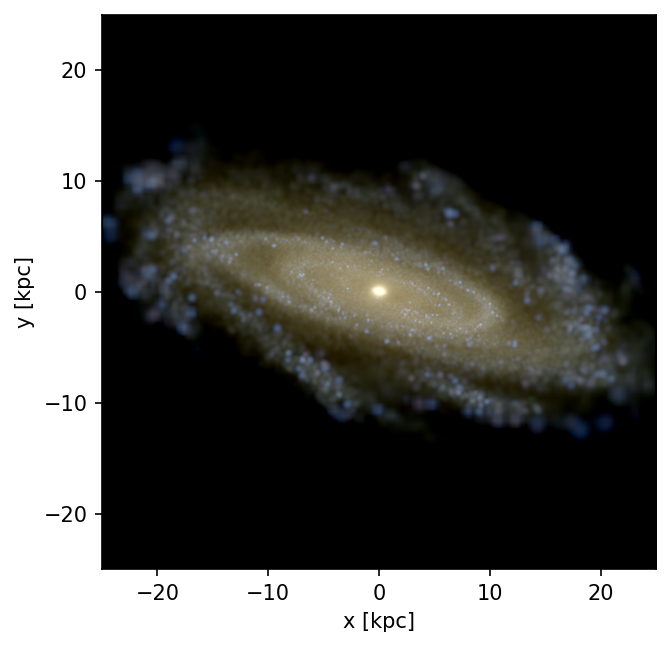

In [16]:
pynbody.plot.stars.render(f.st, width="50 kpc", mag_range=[18, 26])

In reality, the galaxy would be obscured by the dust content in the gas. To estimate this effect, we can
set ``with_dust=True``. The dust model is exceptionally simple, so for detailed scientific analysis one 
should use a specialist radiative transfer package like [Skirt](https://skirt.ugent.be/root/_home.html). 
Nonetheless, it gives a reasonable first estimate of the dust effects.

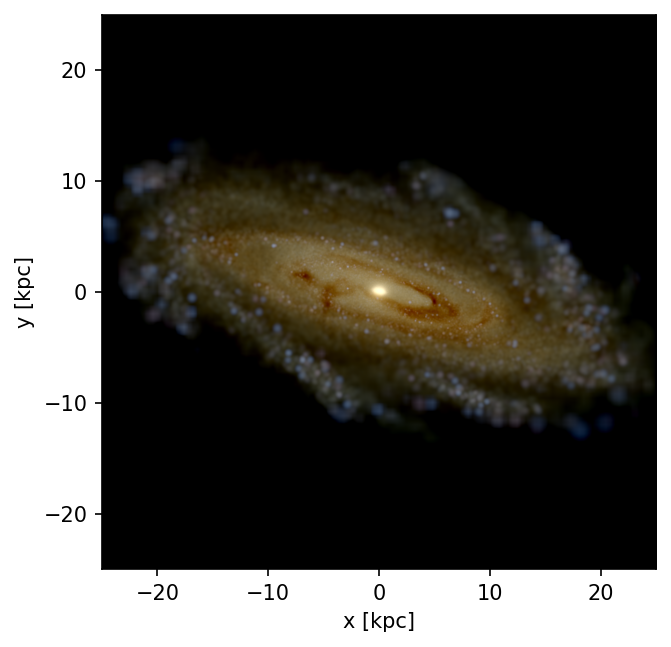

In [17]:
pynbody.plot.stars.render(f, width="50 kpc", with_dust=True, mag_range=[18, 26])

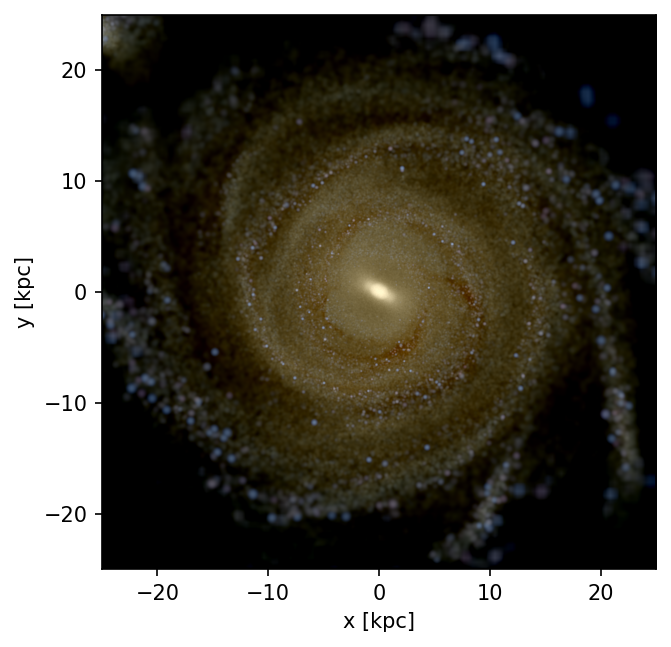

In [18]:
with pynbody.analysis.faceon(h[0]):
    pynbody.plot.stars.render(f, width="50 kpc", with_dust=True, mag_range=[18, 26])

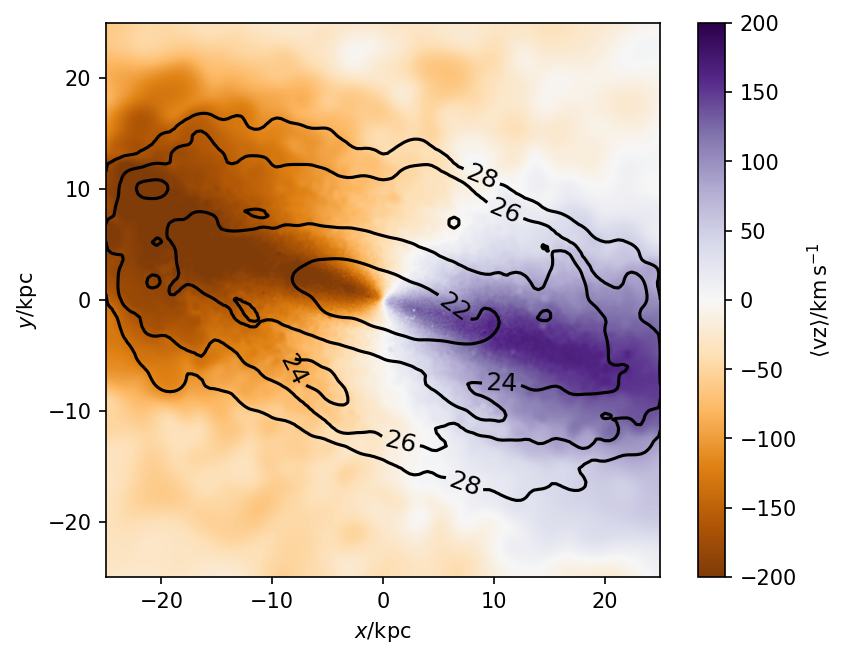

In [19]:
pynbody.plot.sph.image(f.st, qty='vz', cmap='PuOr', width='50 kpc', weight='V_lum_den', 
                       log=False, vmin=-200, vmax=200)
pynbody.plot.stars.contour_surface_brightness(f.st, 'V', width="50 kpc",
                                               contour_kwargs={'colors': 'black', 
                                                               'levels': [22, 24, 26, 28]},
                                               smooth_floor='1.0 kpc')

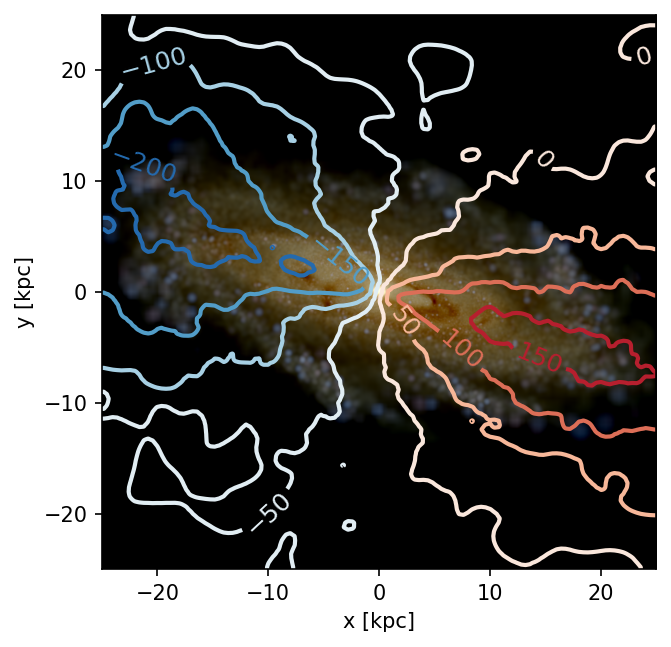

In [20]:
pynbody.plot.stars.render(f, width="50 kpc", with_dust=True, mag_range=[18, 26])
pynbody.plot.sph.contour(f.stars, 'vz', weight='V_lum_den', smooth_floor='0.5 kpc', width="50 kpc",
                         contour_kwargs={'cmap': 'RdBu_r', 'linewidths': 2}, log=False)